In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.preprocessing.image import load_img

In [3]:
img = np.array(load_img("../datasets/panda.jpg",target_size=(100,100)))

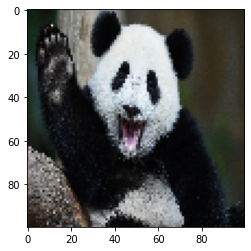

In [4]:
plt.imshow(img)



In [12]:
gray = img.mean(axis=2) /255

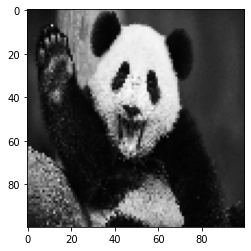

In [13]:
plt.imshow(gray,cmap="gray")

In [14]:
gray.max()


0.9803921568627451

In [16]:
population = np.random.randn(1000,*gray.shape)

In [17]:
population.shape

(1000, 100, 100)

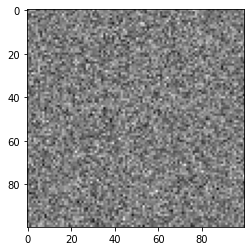

In [19]:
plt.imshow(population[1],cmap="gray")